In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
sys.path.append('../creme/')
import custom_model
import creme
import utils
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pyranges as pr
import shutil
import pickle
import kipoiseq
from itertools import combinations
import scipy
import os
import gene as bgene
import shuffle
from scipy.stats import pearsonr

2023-12-30 05:46:58.986799: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
# best_tiles = []
# bad_counter = 0
# for cell in ['PC-3', 'GM12878', 'K562']:
#     for f in glob.glob(f'../results/motifs_1000/{cell}/*'):
#         res = utils.read_pickle(f)
#         if 1000 in res.keys():
#             best_tiles.append(np.max(res[1000].mean(axis=0) / res['pred_mut']))
#         else:
#             bad_counter += 1
#     sns.histplot(best_tiles)
#     plt.title(cell)
#     plt.show()

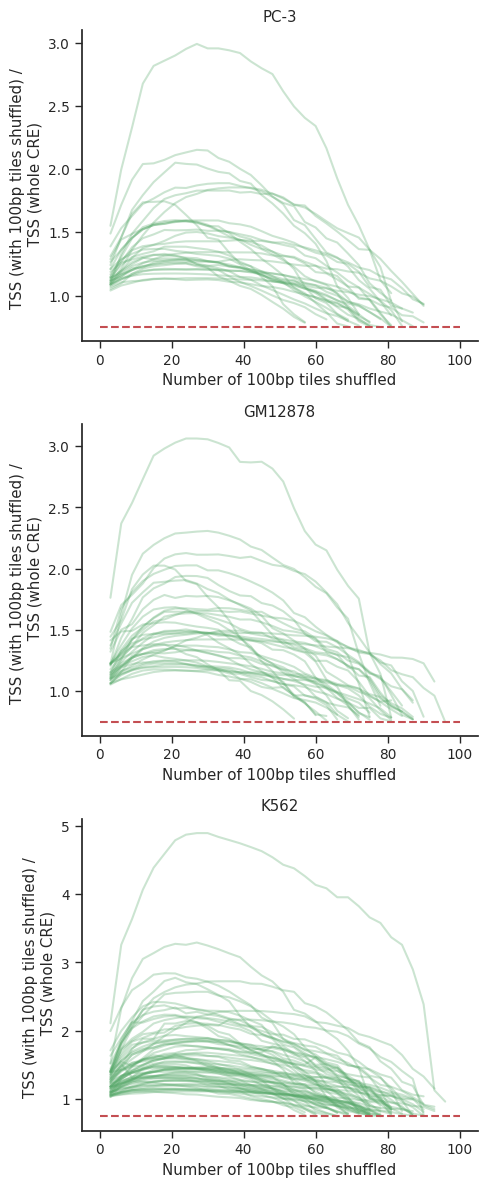

In [22]:
pdf_base_dir = utils.make_dir('pdfs')
pdf_dir = utils.make_dir(f'{pdf_base_dir}/motif_level/')

result_dir = '../results/motifs_100_batch_3_shuffle_10_thresh_0.75'
threshold = float(result_dir.split('_')[-1])

sns.set(font_scale = .9)
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

fig, axes = plt.subplots(3, 1, sharey=False, figsize=[5, 12]) 

for i, cell in enumerate(os.listdir(result_dir)):
    ax = axes[i]
    result_files = glob.glob(f'{result_dir}/{cell}/*pickle')
    for res_path in result_files:
        per_seq_results = utils.read_pickle(res_path)
        if 'fraction_explained' in per_seq_results.keys():
            frac_explained = per_seq_results['fraction_explained'][:-1]
            ax.plot(np.arange(3, 3*len(frac_explained)+1, 3), frac_explained, alpha=0.3, color='g')
    ax.hlines(threshold, 0, 100, color='r', linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(cell)
    ax.set_xlabel('Number of 100bp tiles shuffled')
    ax.set_ylabel('TSS (with 100bp tiles shuffled) / \n TSS (whole CRE)')
    plt.tight_layout()
    fig.savefig(f'{pdf_dir}/{result_dir.split("/")[-1]}.pdf', format='pdf', dpi=300, bbox_inches='tight')
        